In [32]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
# local imports
import Plotting as myplt

In [31]:
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Data\\'

# Data

In [13]:
# store files names for all datasets
filenames: dict[str,str] = {
   'Laser 1s' : path_data + '2-Slit Interference Lab - Laser Single Slit-8_24_23.csv',
   'Laser 2s' : path_data + '2-Slit Interference Lab - Laser Interference Pattern (fine)-8_24_23.csv',
   'Bulb 2s'  : path_data + '2-Slit Interference Lab - Bulb Interference Pattern-8_31_23.csv'
} # s == slit

In [22]:
def UnpackTable(fname: str) -> dict[str,np.array] :
    """Get a table dictionary like {x: xdata, y: ydata} from a CSV file containing data""" 
    # get data from the csv file
    arr = np.genfromtxt(fname, delimiter=",", dtype=str)
    # separate column names and data arrays 
    cols = np.array(arr[0 ], dtype=str)
    data = np.array(arr[1:], dtype=float).T # transpose to get x and y
    # build dictionary to hold the table {x: xdata, y: ydata}
    table = {}
    for col, dat in zip(cols,data) : 
        table[col] = dat
    return table

def UnpackAllTables(filenames: dict[str,str]) -> dict[str, dict[str, np.array]] : 
    """Unpack all tables in the filenames dictionary."""
    tables: dict[str, dict[str, np.array]] = {}
    for experiment, file in filenames.items() :
        # extract data from file 
        tables[experiment] = UnpackTable(file)
        # print some helpful info 
        print(experiment, 'columns:\t', list(tables[experiment].keys() ))
    return tables

tables: dict[str, dict[str, np.array]] = UnpackAllTables(filenames)

Laser 1s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Laser 2s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Bulb 2s columns:	 ['Micrometer Position (mm)', 'Counts/10s', 'Photon/S (Hz)']


# Basic Plots

In [46]:
colors: dict[str,str] = {
    'Laser' : 'maroon',
    'Bulb'  : 'green'
}

In [36]:
def PlotXY(
    x: np.array,        # x axis data points
    y: np.array,        # y axis data points
    xlab: str,          # label on x axis 
    ylab: str,          # label on y axis
    color = 'k',        # color of the line 
    fileName: str = ''  # filename to save the figure as
) : 
    """Basic plotting function for x and y data arrays."""
    # formatting 
    myplt.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    # data
    plt.plot(x,y,color=color)
    # finish 
    if(fileName != '') : myplt.Save(path_fig + fileName)
    plt.show()
    plt.close()

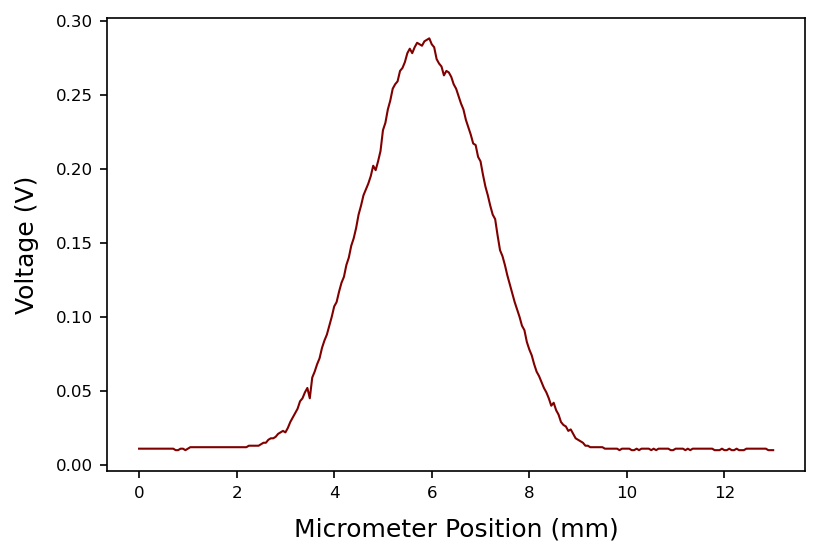

In [47]:
PlotXY(
    x = tables['Laser 1s']['Micrometer Position (mm)'],
    y = tables['Laser 1s']['Voltage (V)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Voltage (V)',
    color = colors['Laser'],
    fileName = 'Laser1s.png'
)

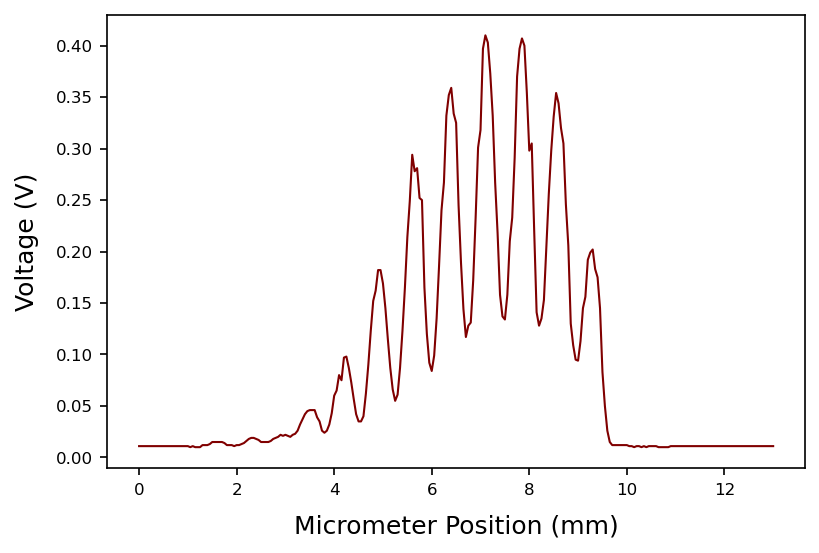

In [48]:
PlotXY(
    x = tables['Laser 2s']['Micrometer Position (mm)'],
    y = tables['Laser 2s']['Voltage (V)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Voltage (V)',
    color = colors['Laser'],
    fileName = 'Laser2s.png'
)

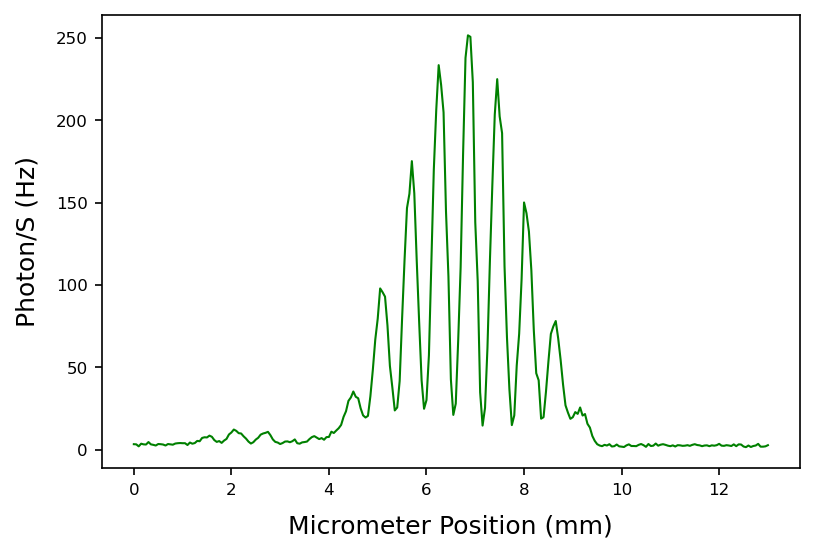

In [49]:
PlotXY(
    x = tables['Bulb 2s']['Micrometer Position (mm)'],
    y = tables['Bulb 2s']['Photon/S (Hz)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    color = colors['Bulb'],
    fileName = 'Bulb2s.png'
)

# Fit Data